## III.2 Separable PINN on Any Geometry

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import scienceplots
plt.style.use(['science', 'grid'])
from phd.plot import get_current_config, book_config
book_config.set_as_current()
page_width = get_current_config().page_width
# Configuration
save_fig = True
save_table = True
if save_fig:
    mpl.rcParams['pgf.texsystem'] = 'pdflatex'

from phd.geo import hcubeMesh, plotBC, plotMesh, setAxisLabel

In [ ]:
# Define the parameters
y_max = 100
x_max = 100
notch_diameter = 50
notch_radius = notch_diameter / 2
notch_height = 50
notch_center1 = (0, 50)
notch_center2 = (100, 50)
n_points = 20

# Generate the top and bottom boundaries
top = np.array([(x, y_max) for x in np.linspace(0, x_max, n_points)])
bottom = np.array([(x, 0) for x in np.linspace(0, x_max, n_points)])

# Generate the left and right boundaries
left_1 = np.array([(0, y) for y in np.linspace(0, notch_height - notch_radius, int(n_points/4))])
left_2 = np.array([(0, y) for y in np.linspace(notch_height + notch_radius, y_max, int(n_points/4))])
left_circle = np.array([(notch_center1[0] + notch_radius * np.sin(t), notch_center1[1] + notch_radius * np.cos(t)) for t in np.linspace(np.pi, 0, n_points)])[1:-1]
left = np.concatenate([left_1, left_circle, left_2])

right_1 = np.array([(x_max, y) for y in np.linspace(0, notch_height - notch_radius, int(n_points/4))])
right_2 = np.array([(x_max, y) for y in np.linspace(notch_height + notch_radius, y_max, int(n_points/4))])
right_circle = np.array([(notch_center2[0] + notch_radius * np.sin(t), notch_center2[1] + notch_radius * np.cos(t)) for t in np.linspace(np.pi, 2 * np.pi, n_points)])[1:-1]
right = np.concatenate([right_1, right_circle, right_2])

In [2]:
upX=top[:,0];upY=top[:,1]
lowX=bottom[:,0];lowY=bottom[:,1]
leftX=left[:,0];leftY=left[:,1]
rightX=right[:,0];rightY=right[:,1]

h=0.01
ny=len(leftX);nx=len(lowX)
myMesh=hcubeMesh(leftX,leftY,rightX,rightY,
	             lowX,lowY,upX,upY,h,False,False,
	             tolMesh=1e-10,tolJoint=1e-2)

====>Check bc nodes!
====>BC nodes pass!
The mesh generation reaches covergence!


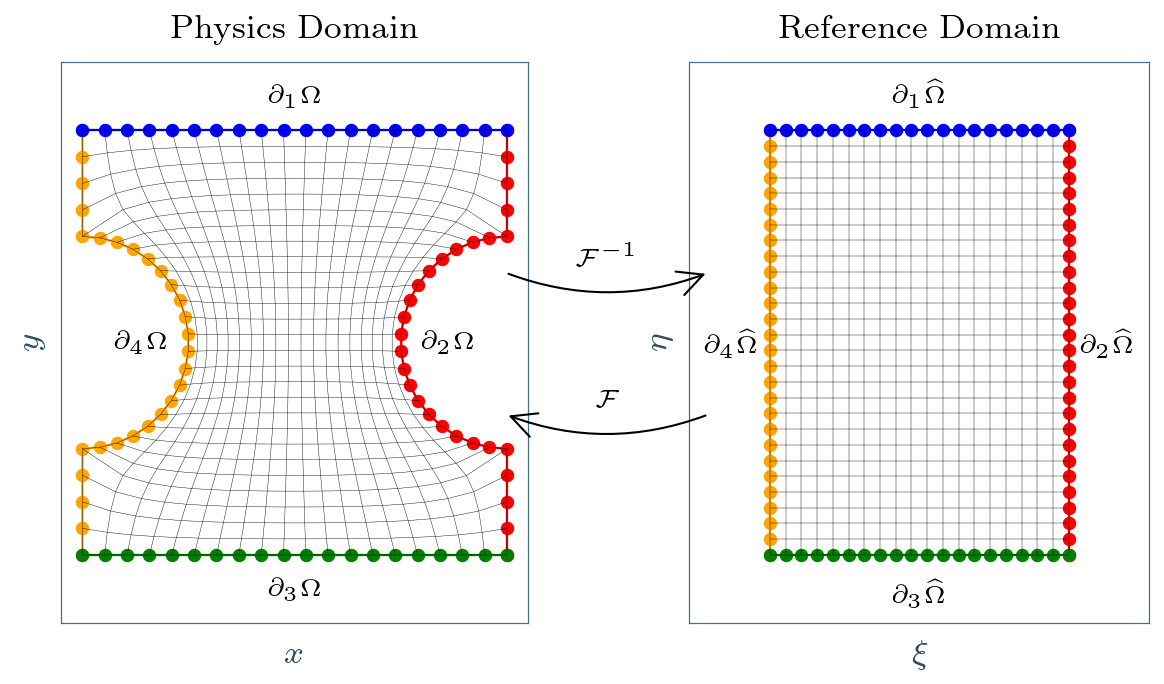

Figure saved to ./images/elliptic_mapping.png and ./images/pgf/elliptic_mapping.pgf


In [10]:
import scienceplots  # optional, requires latex
plt.style.use(['science', 'grid'])
from matplotlib.patches import FancyArrowPatch
book_config.set_as_current()
page_width = get_current_config().page_width

fig, ax = plt.subplots(1, 2,figsize=(page_width, page_width*0.5),dpi=300)
plotBC(ax[0],myMesh.x,myMesh.y)
plotMesh(ax[0],myMesh.x,myMesh.y,width=0.1)
setAxisLabel(ax[0],'p')
# ax[0].xaxis.label.set_fontsize(get_current_config().title_font_size)
ax[0].set_aspect('equal')
ax[0].set_title('Physics Domain')
ax[0].set_xticks([])
ax[0].set_yticks([])

plotBC(ax[1],myMesh.xi,myMesh.eta)
plotMesh(ax[1],myMesh.xi,myMesh.eta,width=0.1)
setAxisLabel(ax[1],'r')
ax[1].set_aspect('equal')
ax[1].set_title('Reference Domain')
ax[1].set_xticks([])
ax[1].set_yticks([])
fig.tight_layout()

# --- Adjust axis limits with padding ---
# Physics domain: add padding only top/bottom
xmin, xmax = ax[0].get_xlim()
ymin, ymax = ax[0].get_ylim()
y_pad = 0.1 * (ymax - ymin)  # 15% vertical padding
ax[0].set_xlim(xmin, xmax)    # keep original horizontally
ax[0].set_ylim(ymin - y_pad, ymax + y_pad)

# Reference domain: add padding everywhere
xmin, xmax = ax[1].get_xlim()
ymin, ymax = ax[1].get_ylim()
x_pad = 0.2 * (xmax - xmin)
y_pad = 0.1 * (ymax - ymin)
ax[1].set_xlim(xmin - x_pad, xmax + x_pad)
ax[1].set_ylim(ymin - y_pad, ymax + y_pad)

# ---- Add arrows between the two subplots ----
# Forward mapping arrow (Physics -> Reference)
arrow_fwd_h = 0.60
arrow_inv_h = 0.40

arrow_fw = FancyArrowPatch(
    (0.425, arrow_fwd_h), (0.575, arrow_fwd_h),
    transform=fig.transFigure,  # relative to figure coordinates
    connectionstyle="arc3,rad=0.2",
    arrowstyle="->",
    mutation_scale=15,
    linewidth=0.5,
    # color="black"
)
fig.patches.append(arrow_fw)
fig.text(0.5, arrow_fwd_h, r'$\mathcal{F}^{-1}$', ha='center', va='bottom')

# Inverse mapping arrow (Reference -> Physics)
arrow_inv = FancyArrowPatch(
    (0.575, arrow_inv_h), (0.425, arrow_inv_h),
    transform=fig.transFigure,
    connectionstyle="arc3,rad=-0.2",
    arrowstyle="->",
    mutation_scale=15,
    linewidth=0.5,
    # color="black"
)
fig.patches.append(arrow_inv)
fig.text(0.5, arrow_inv_h, r'$\mathcal{F}$', ha='center', va='bottom')

# ---- Boundary labels ----
# Physics domain
ax[0].text(0.5, 0.92, r'$\partial_1\Omega$', ha='center', va='bottom', transform=ax[0].transAxes)
ax[0].text(0.77, 0.5, r'$\partial_2\Omega$', ha='left', va='center', transform=ax[0].transAxes)
ax[0].text(0.5, 0.08, r'$\partial_3\Omega$', ha='center', va='top', transform=ax[0].transAxes)
ax[0].text(0.23, 0.5, r'$\partial_4\Omega$', ha='right', va='center', transform=ax[0].transAxes)

# Reference domain
ax[1].text(0.5, 0.92, r'$\partial_1\widehat{\Omega}$', ha='center', va='bottom', transform=ax[1].transAxes)
ax[1].text(0.85, 0.5, r'$\partial_2\widehat{\Omega}$', ha='left', va='center', transform=ax[1].transAxes)
ax[1].text(0.5, 0.08, r'$\partial_3\widehat{\Omega}$', ha='center', va='top', transform=ax[1].transAxes)
ax[1].text(0.15, 0.5, r'$\partial_4\widehat{\Omega}$', ha='right', va='center', transform=ax[1].transAxes)

fig.tight_layout()
plt.show()

if save_fig:
    figure_folder = "./images"
    os.makedirs(figure_folder + '/pgf', exist_ok=True)
    fig.savefig(os.path.join(figure_folder, 'pgf', 'elliptic_mapping.pgf'), bbox_inches='tight')
    fig.savefig(os.path.join(figure_folder, 'elliptic_mapping.png'), dpi=300, bbox_inches='tight')
    print(f"Figure saved to {figure_folder}/elliptic_mapping.png and {figure_folder}/pgf/elliptic_mapping.pgf")
